In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:

# Paths
base_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\data\\raw\\'
output_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\Assignment\\WildFireDetection\\results\\outputs\\'
splits = ['train', 'val', 'test']
classes = ['fire', 'nofire']

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USER\AppData\Local\Temp\ipykernel_34780\4191558606.py:3: SyntaxWarning: invalid escape sequence '\A'
  output_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\Assignment\\WildFireDetection\\results\\outputs\\'


In [ ]:

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Transform: resize & convert to tensor (GPU-ready)
transform = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.ToTensor()
])  

Using device: cuda


In [4]:

# Function to preprocess and save images
def preprocess_and_save(input_path, output_path, split, cls):
    os.makedirs(output_path, exist_ok=True)
    img_files = [f for f in os.listdir(input_path) if f.endswith('.jpg')]
    
    for img_name in tqdm(img_files, desc=f"{split}-{cls}", unit="img"):
        try:
            # Load image
            img = Image.open(os.path.join(input_path, img_name)).convert("RGB")
            
            # Apply transform (resize)
            img_tensor = transform(img).unsqueeze(0).to(device)

            # Move back to CPU for saving
            img_cpu = img_tensor.squeeze(0).cpu()
            img_pil = transforms.ToPILImage()(img_cpu)

            # Save resized image
            img_pil.save(os.path.join(output_path, img_name))
        except Exception as e:
            print(f"Error processing {img_name}: {e}")


In [ ]:

# Process all splits
for split in splits:
    for cls in classes:
        input_path = os.path.join(base_dir, split, cls)
        output_path = os.path.join(output_dir, split, cls)
        preprocess_and_save(input_path, output_path, split, cls)

train-nofire:   3%|▎         | 33/1155 [00:09<09:57,  1.88img/s]c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
train-nofire:   3%|▎         | 37/1155 [00:11<07:05,  2.62img/s]c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
test-nofire:   1%|          | 3/251 [00:00<00:22, 11.01img/s]c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:3406: Decompre

In [ ]:

# Validate split distribution
split_counts = {split: Counter() for split in splits}
for split in splits:
    for cls in classes:
        cls_path = os.path.join(output_dir, split, cls)
        count = len([f for f in os.listdir(cls_path) if f.endswith('.jpg')])
        split_counts[split][cls] = count

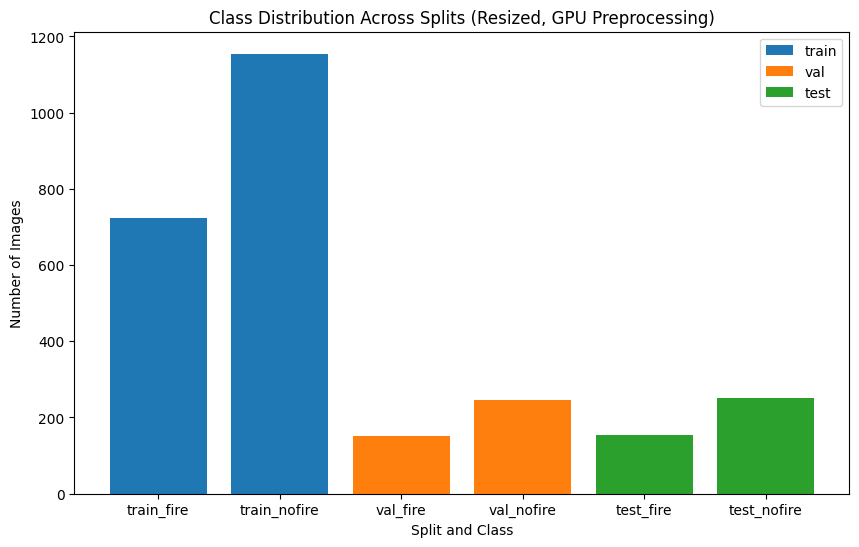

Split Counts: {'train': Counter({'nofire': 1155, 'fire': 723}), 'val': Counter({'nofire': 246, 'fire': 152}), 'test': Counter({'nofire': 251, 'fire': 154})}


In [ ]:

# Bar plot
plt.figure(figsize=(10, 6))
for split in splits:
    plt.bar([f'{split}_{cls}' for cls in classes],
            [split_counts[split][cls] for cls in classes],
            label=split)
plt.title('Class Distribution Across Splits')
plt.xlabel('Split and Class')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

print("Split Counts:", split_counts)